<a href="https://colab.research.google.com/github/vennasandeepreddy/Toxic_comment_classification/blob/main/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Toxic Comment Classification

### Exploratory Data Analysis

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option("display.max_colwidth", -1)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Toxic_Comment_Classification/toxic_comment_dataset.xlsx')

In [ ]:
df_copy = df

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [ ]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand. I came here and my idea was bad right away. What kind of community goes """"you have bad ideas"""" go away, instead of helping rewrite them. """,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159449 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

id               0  
comment_text     122
toxic            0  
severe_toxic     0  
obscene          0  
threat           0  
insult           0  
identity_hate    0  
dtype: int64

In [ ]:
df[df['comment_text'].isnull()].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
56,0020fd96ed3b8c8b,NaN,1,0,1,0,1,0
1307,0391fa5d2ea8a52a,NaN,0,0,0,0,0,0
2306,063581ee63c49b08,NaN,0,0,0,0,0,0
2461,06928d7e2969745b,NaN,0,0,0,0,0,0
2463,06933310fe55a295,NaN,0,0,0,0,0,0


In [ ]:
df.dropna(inplace=True)

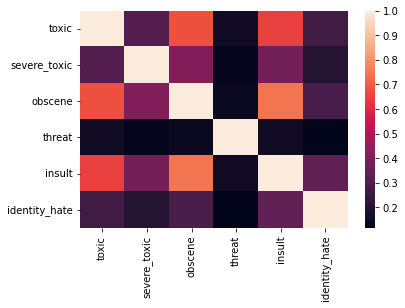

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.iloc[:, 2:].sum()

toxic            15268
severe_toxic     1593 
obscene          8432 
threat           475  
insult           7865 
identity_hate    1404 
dtype: int64

In [ ]:
from wordcloud import WordCloud

def wordCloud_generator(toxic_type, toxic_name):
  print("\n {} ".format(toxic_name))
  spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(toxic_type))
  plt.figure(figsize=(10,8), facecolor='k')
  plt.imshow(spam_cloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()
  print("========================================================")


 toxic 


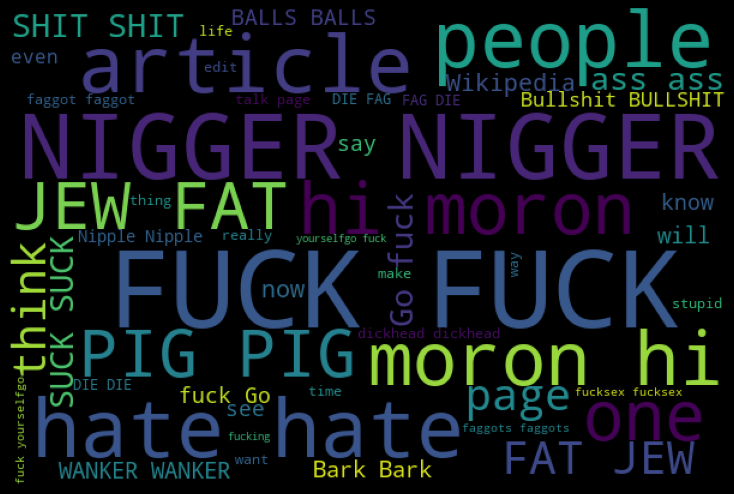


 severe_toxic 


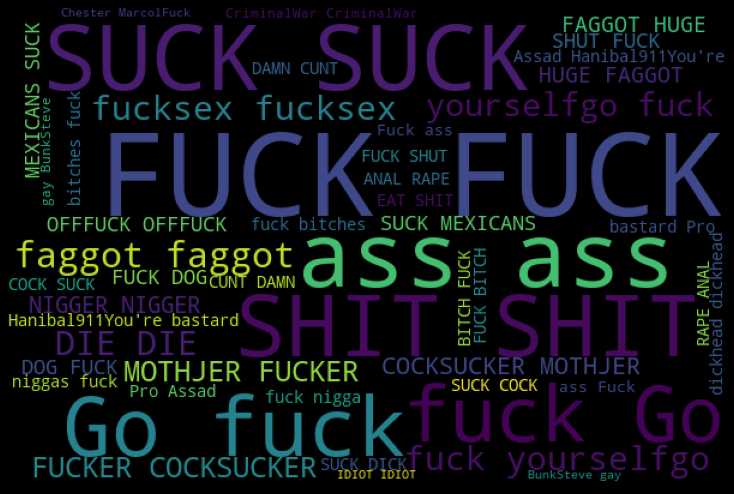


 obscene 


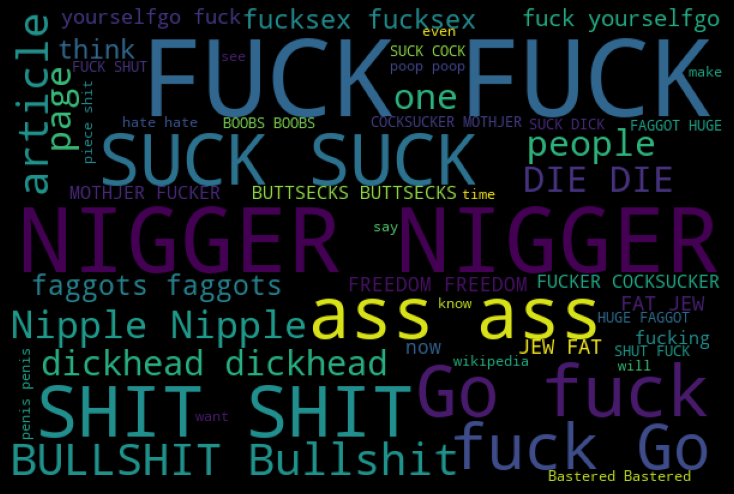


 threat 


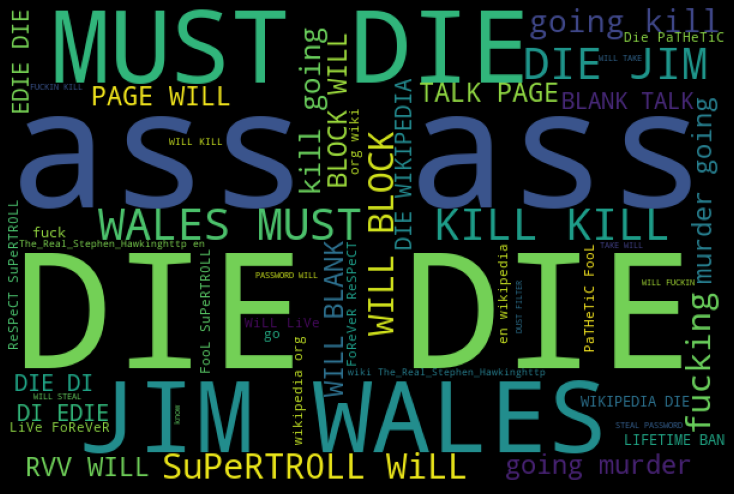


 insult 


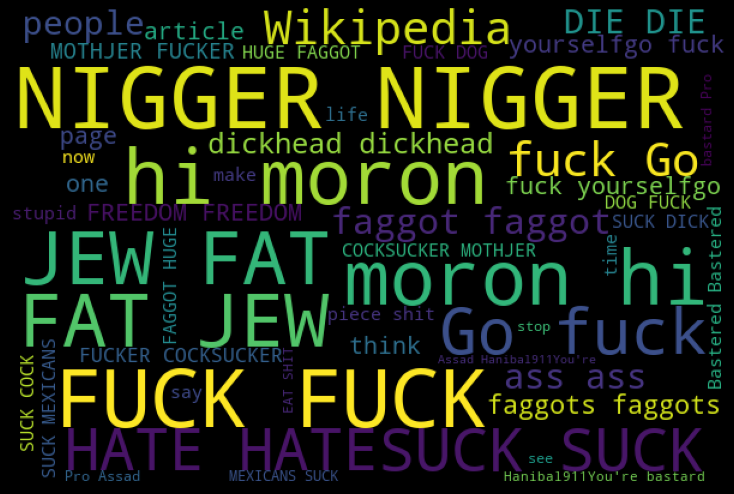


 identity_hate 


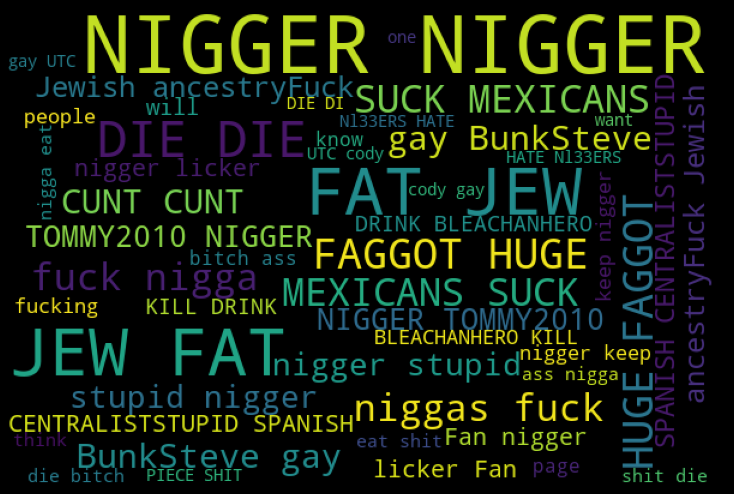

In [ ]:
toxic = df['comment_text'][df['toxic']==1]
severe_toxic = df['comment_text'][df['severe_toxic']==1]
obscene = df['comment_text'][df['obscene']==1]
threat = df['comment_text'][df['threat']==1]
insult = df['comment_text'][df['insult']==1]
identity_hate = df['comment_text'][df['identity_hate']==1]

word_cloud_dict = {"toxic" : toxic,
                   "severe_toxic" : severe_toxic,
                   "obscene": obscene,
                   "threat" : threat,
                   "insult" : insult,
                   "identity_hate" : identity_hate }

for key in word_cloud_dict:
  wordCloud_generator(word_cloud_dict[key], key)

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

stop = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Featurization

In [ ]:
df['comment_text'] = df['comment_text'].astype(str)
df['comment_text'] = df['comment_text'].str.lower()

# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', ' ')


#removing stop words
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lematizing
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(x)]))

#remove words with less than 2 charecters
df['comment_text'] = df['comment_text'].str.replace(r'\b\w{1,2}\b', ' ')

# Replace whitespace between terms with a single space
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', '')

df['comment_text'] = df['comment_text'].str.replace(r'[^A-Za-z]+', ' ')

df.dropna(inplace=True)

In [ ]:
X = df['comment_text'].str.lower()
y = df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
X.head()

0    explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired number number                                                                                                                                                                                             
1    aww match background colour seemingly stuck thanks talk number number january number number utc                                                                                                                                                                                                                                                                        
2    hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info                                                                                                                            

### saving the df to csv

In [ ]:
df.to_csv("/content/drive/MyDrive/Toxic_Comment_Classification/toxic_comment_dataset_preprocessed.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Toxic_Comment_Classification/toxic_comment_dataset_preprocessed.csv")

### w2v

In [ ]:
import gensim

In [ ]:
X.values

array(['explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired number number',
       'aww match background colour seemingly stuck thanks talk number number january number number utc',
       'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
       ...,
       'spitzer umm there actual article prostitution ring crunch captain',
       'look like actually put speedy first version deleted look',
       'really think understand came idea bad right away kind community bad idea away instead helping rewrite'],
      dtype=object)

In [ ]:
review_text = X.apply(gensim.utils.simple_preprocess)

In [ ]:
review_text

0         [explanation, edits, made, username, hardcore, metallica, fan, reverted, vandalism, closure, gas, voted, new, york, doll, fac, please, remove, template, talk, page, since, retired, number, number]                                                                                                                                                                                                                      
1         [aww, match, background, colour, seemingly, stuck, thanks, talk, number, number, january, number, number, utc]                                                                                                                                                                                                                                                                                                            
2         [hey, man, really, trying, edit, war, guy, constantly, removing, relevant, information, talking, edits, instead, talk, page, seems, care, formatting

#### Training the Word2Vec Model

##### Initialize the model

In [ ]:
w2v_model = gensim.models.Word2Vec(
    window=10,
    size = 300,
    min_count=2,
    workers=4,
)

##### Build Vocabulary

In [ ]:
w2v_model.build_vocab(review_text, progress_per=1000)

##### Train the Word2Vec Model

In [ ]:
w2v_model.train(review_text, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

(25601633, 27725980)

In [ ]:
w2v_model.save("/content/drive/MyDrive/Toxic_Comment_Classification/word2vec-Toxic_comment.model")

In [ ]:
w2v_model = gensim.models.Word2Vec.load("/content/drive/MyDrive/Toxic_Comment_Classification/word2vec-Toxic_comment.model")

In [ ]:
type(w2v_model)

gensim.models.word2vec.Word2Vec

In [ ]:
X.head()

0    explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired number number                                                                                                                                                                                             
1    aww match background colour seemingly stuck thanks talk number number january number number utc                                                                                                                                                                                                                                                                        
2    hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info                                                                                                                            

In [ ]:
local_word2vec_words = list(w2v_model.wv.vocab)

In [ ]:
w2v_words = set(local_word2vec_words)

In [ ]:
w2v_dict = dict()
for word in w2v_words:  
	w2v_dict[word] = w2v_model[word]

In [ ]:
type(review_text)

pandas.core.series.Series

In [ ]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.30, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size = 0.5, random_state=42, shuffle=True)

In [ ]:
Tfidf_vectorizer = TfidfVectorizer(min_df = 10, ngram_range = (1, 1), stop_words = stop, use_idf = True)
Tfidf_vectorizer.fit(X_train.values)

# we are converting a dictionary with word as a key, and the idf as a value
tfidf_dict = dict(zip(Tfidf_vectorizer.get_feature_names(), list(Tfidf_vectorizer.idf_)))
tfidf_words = set(Tfidf_vectorizer.get_feature_names())

In [ ]:
# computing tf-idf weighted word2vec for each comment.

def comp_tfidf_weighted_w2v(data, w2v_words, tfidf_words, w2v_dict, tfidf_dict):

    tfidf_w2v = []
    for sentence in tqdm(data):
        vector = np.zeros(300) 
        # as word vectors are of zero length
        tf_idf_weight = 0;
        # num of words with a valid vector in the sentence/review
        for word in sentence.split(): 
            # for each word in a review/sentence
            if (word in w2v_words) and (word in tfidf_words):
                vec = w2v_dict[word] 
                # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and 
                #the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = tfidf_dict[word]*(sentence.count(word)/len(sentence.split()))
                # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v.append(vector)
    return np.array(tfidf_w2v)

In [ ]:
X_train_tfidf_w2v = comp_tfidf_weighted_w2v(X_train.values, w2v_words, tfidf_words, w2v_dict, tfidf_dict)
X_val_tfidf_w2v = comp_tfidf_weighted_w2v(X_val.values, w2v_words, tfidf_words, w2v_dict, tfidf_dict)
X_test_tfidf_w2v = comp_tfidf_weighted_w2v(X_test.values, w2v_words, tfidf_words, w2v_dict, tfidf_dict)

  0%|          | 0/111614 [00:00<?, ?it/s]

  0%|          | 0/79724 [00:00<?, ?it/s]

  0%|          | 0/79725 [00:00<?, ?it/s]

In [ ]:
print("Shape of X-Train data=",X_train_tfidf_w2v.shape)
print("Shape of X-val data=",X_val_tfidf_w2v.shape)
print("Shape of X-Test data=",X_test_tfidf_w2v.shape)

Shape of X-Train data= (111614, 300)
Shape of X-val data= (79724, 300)
Shape of X-Test data= (79725, 300)


In [ ]:
print("Shape of y-Train data=",y_train.shape)
print("Shape of y-val data=",y_val.shape)
print("Shape of y-Test data=",y_test.shape)

Shape of y-Train data= (111614, 6)
Shape of y-val data= (79724, 6)
Shape of y-Test data= (79725, 6)


### Baseline models

### Multi-label classification
###### https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

In [ ]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 6.9 MB/s 


In [ ]:
import scipy

#multi-label 
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

#metrics
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc,roc_auc_score

#modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#Tensor flow for MLP
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Activation,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.callbacks import Callback

#model loading
from tensorflow.keras.models import load_model

In [ ]:
def cal_metrics(y_true,y_pred,y_pred_proba):

    """function to calculate final metrics """

    if isinstance(y_true, scipy.sparse.lil.lil_matrix):
        y_true = y_true.A
    
    if isinstance(y_pred, scipy.sparse.lil.lil_matrix):
        y_pred = y_pred.A
    
    if isinstance(y_pred_proba, scipy.sparse.lil.lil_matrix):
        y_pred_proba = y_pred_proba.A

    acc=accuracy_score(y_true, y_pred)
    avg_auc = np.mean(roc_auc_score(y_true, y_pred_proba, average=None))
    ham_loss = hamming_loss(y_true, y_pred)
    logloss = log_loss(y_true, y_pred)

    return {"Accuracy":acc,"Average AUC":avg_auc,"Hamming Loss":ham_loss,"Log Loss":logloss}

In [ ]:
clf = BinaryRelevance(LogisticRegression())
clf.fit(X_train_tfidf_w2v, y_train)
pred = clf.predict(X_test_tfidf_w2v)
pred_proba = clf.predict_proba(X_test_tfidf_w2v)

print("\n Accuracy Score : {}".format(accuracy_score(y_test,pred)))
print("\n Average AUC Score : {}".format(np.mean(roc_auc_score(y_test, pred_proba.A, average=None))))
print("\n Hamming loss : {}".format(hamming_loss(y_test,pred)))
print("\n Log loss : {}".format(log_loss(y_test,pred.A)))


 Accuracy Score : 0.9056130448416432

 Average AUC Score : 0.9597570351892837

 Hamming loss : 0.023898818856485836

 Log loss : 1.487558361966342


#### Label PowerSet

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
    
clf = LabelPowerset(LogisticRegression())
clf.fit(X_train_tfidf_w2v, y_train)
pred = clf.predict(X_test_tfidf_w2v)
pred_proba = clf.predict_proba(X_test_tfidf_w2v)

print("\n Accuracy Score : {}".format(accuracy_score(y_test,pred)))
print("\n Average AUC Score : {}".format(np.mean(roc_auc_score(y_test, pred_proba.A, average=None))))
print("\n Hamming loss : {}".format(hamming_loss(y_test,pred)))
print("\n Log loss : {}".format(log_loss(y_test,pred.A)))


 Accuracy Score : 0.9099027908435247

 Average AUC Score : 0.9632148138876427

 Hamming loss : 0.02423748301452911

 Log loss : 1.0896428553585606


#### Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Embedding
import matplotlib.pyplot as plt

In [ ]:
class custom_callbacks(tf.keras.callbacks.Callback):
  #this is a custom call back 

    def __init__(self,training_data,validation_data,acc_threshold,auc_threshold,filepath):

        super(custom_callbacks, self).__init__()
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        self.acc_threshold = acc_threshold
        self.auc_threshold = auc_threshold
        self.best_metric= float("inf")
        self.filepath=filepath

    def on_train_begin(self, logs={}):

        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys exact match ratio (accuracy), hamming loss,
        # average AUC (calculated AUC on each column and made average) and logloss
    
        self.history={'EMR': [],'val_EMR': [],'ham_loss': [],'val_ham_loss': [],
                      'log_loss':[],'val_log_loss':[],'avg_AUC':[],'val_avg_AUC':[]}                      

    def on_epoch_end(self, epoch, logs={}):
        # on end of each epoch, we will get logs and update the self.history dict

        #predicts on train data

        predict_train_proba = np.asarray(self.model.predict(self.x))
        predict_train = (np.asarray(self.model.predict(self.x))).round()
        train_metrics= cal_metrics(self.y,predict_train,predict_train_proba)

        self.history['EMR'].append(train_metrics['Accuracy'])
        self.history['avg_AUC'].append(train_metrics['Average AUC'])
        self.history['ham_loss'].append(train_metrics['Hamming Loss'])
        self.history['log_loss'].append(train_metrics['Log Loss'])

        #predicts on test data

        predict_test_proba = np.asarray(self.model.predict(self.x_val))
        predict_test = (np.asarray(self.model.predict(self.x_val))).round()
        test_metrics= cal_metrics(self.y_val,predict_test,predict_test_proba)

        self.history['val_EMR'].append(test_metrics['Accuracy'])
        self.history['val_avg_AUC'].append(test_metrics['Average AUC'])
        self.history['val_ham_loss'].append(test_metrics['Hamming Loss'])
        self.history['val_log_loss'].append(test_metrics['Log Loss'])

        print("-EMR :",round(train_metrics['Accuracy'],4),
              "-val_EMR:",round(test_metrics['Accuracy'],4),
              "-avg_AUC:",round(train_metrics['Average AUC'],4),
              "-val_avg_AUC:",round(test_metrics['Average AUC'],4),
              "-Hamming_Loss:",round(train_metrics['Hamming Loss'],4),
              "-val_Hamming_Loss:",round(test_metrics['Hamming Loss'],4),
              "-Log_Loss:",round(train_metrics['Log Loss'],4),
              "-val_Log_Loss:",round(test_metrics['Log Loss'],4))
              
        print("\n")
        
        if (self.best_metric>test_metrics['Hamming Loss']):
            print("val_Hamming_Loss has been improved from ",round(self.best_metric,4)," to ",round(test_metrics['Hamming Loss'],4),"So, Saving model to ",self.filepath)
            self.model.save(self.filepath)
            self.best_metric=test_metrics['Hamming Loss']
        else:
            print("val_Hamming_Loss has not been improved from ",round(self.best_metric,4))
        
        #custom code stop training after reaching a particular parameter to a threshold
        if (test_metrics['Accuracy'] >= self.acc_threshold) and (test_metrics['Average AUC'] >= self.auc_threshold) :
            print("Metrics reached the threshold... So, Termination")
            self.model.stop_training = True  
        print("\n")

In [ ]:
#creating an object for the custom call back class
call_back = custom_callbacks(training_data = (X_train_tfidf_w2v, y_train),
                           validation_data = (X_val_tfidf_w2v, y_val),
                           acc_threshold=0.98,
                           auc_threshold=0.98,
                           filepath="/content/drive/MyDrive/Toxic_Comment_Classification/DNN.h5")

In [ ]:
dnn_model = Sequential()
dnn_model.add(Dense(300, input_dim=X_train_tfidf_w2v.shape[1], activation='relu'))
dnn_model.add(Dense(150, activation='relu'))
dnn_model.add(Dropout(rate = 0.3))
dnn_model.add(Dense(75, activation='relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(y_train.shape[1], activation='sigmoid'))

In [ ]:
dnn_model.save("/content/drive/MyDrive/Toxic_Comment_Classification/DNN.h5")

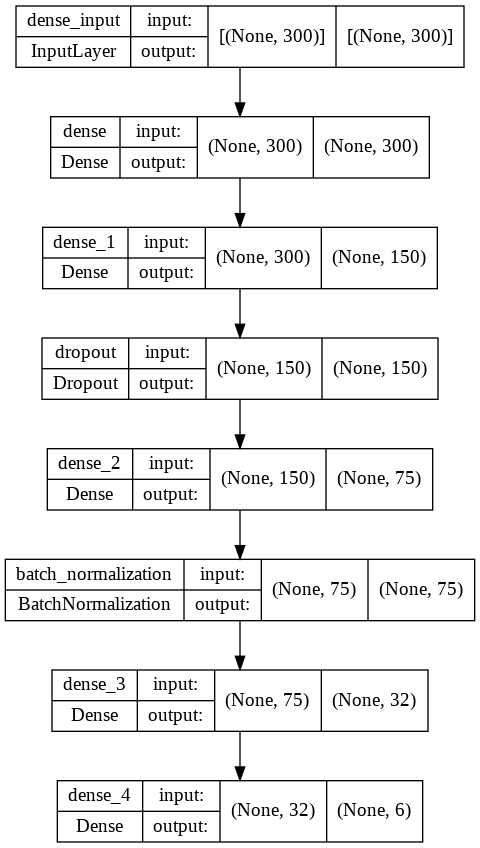

In [ ]:
tf.keras.utils.plot_model(dnn_model, show_shapes=True, show_layer_names=True)

Epoch 1/5
1737/1744 [============================>.] - ETA: 0s - loss: 0.0800 - accuracy: 0.8109 - auc: 0.9471-EMR : 0.9089 -val_EMR: 0.9083 -avg_AUC: 0.9588 -val_avg_AUC: 0.9583 -Hamming_Loss: 0.0221 -val_Hamming_Loss: 0.0222 -Log_Loss: 1.6205 -val_Log_Loss: 1.6426


val_Hamming_Loss has been improved from  inf  to  0.0222 So, Saving model to  /content/drive/MyDrive/Toxic_Comment_Classification/DNN.h5


1744/1744 [==============================] - 34s 17ms/step - loss: 0.0799 - accuracy: 0.8111 - auc: 0.9472 - val_loss: 0.0645 - val_accuracy: 0.8824 - val_auc: 0.9664
Epoch 2/5
1735/1744 [============================>.] - ETA: 0s - loss: 0.0660 - accuracy: 0.9314 - auc: 0.9629-EMR : 0.9124 -val_EMR: 0.9119 -avg_AUC: 0.9648 -val_avg_AUC: 0.964 -Hamming_Loss: 0.0213 -val_Hamming_Loss: 0.0214 -Log_Loss: 1.4958 -val_Log_Loss: 1.5145


val_Hamming_Loss has been improved from  0.0222  to  0.0214 So, Saving model to  /content/drive/MyDrive/Toxic_Comment_Classification/DNN.h5


1744/1744 [====

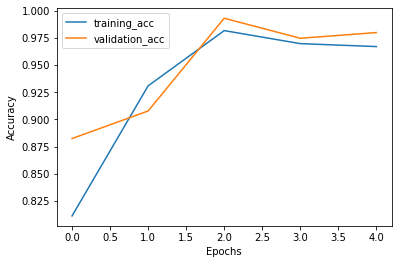

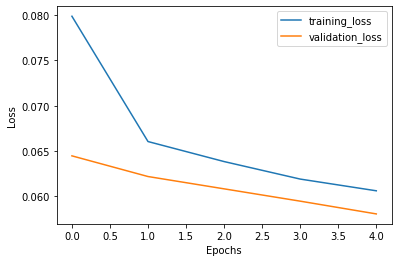

In [ ]:
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC()])

history = dnn_model.fit(X_train_tfidf_w2v, y_train,
                    epochs = 5,
                    validation_data = (X_val_tfidf_w2v,y_val), 
                    batch_size = 64,
                    callbacks = [call_back]
                   )

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training_acc", "validation_acc"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["training_loss", "validation_loss"])
plt.show()

In [ ]:
print("\n Accuracy Score : {}".format(history.history['accuracy']))
print("\n Average AUC Score : {}".format(history.history['avg_AUC']))
print("\n Hamming loss : {}".format(history.history['Hamming_Loss']))
print("\n Log loss : {}".format(history.history['Log_Loss']))

#### Bidirectional LSTM

In [ ]:
bi_lstm_model = Sequential()
bi_lstm_model.add(Embedding(input_dim = len(w2v_dict.keys()),
                    output_dim = 300,
                    weights=[w2v_model.wv.vectors],
                   # input_length=MAX_SEQUENCE_LENGTH,
                   # mask_zero=True,
                    trainable=False))

bi_lstm_model.add(Bidirectional(LSTM(100)))
bi_lstm_model.add(Dense(6, activation='softmax'))

In [ ]:
bi_lstm_model.save("/content/drive/MyDrive/Toxic_Comment_Classification/bi_lstm.h5")

In [ ]:
#creating an object for the custom call back class
call_back_bi_lstm = custom_callbacks(training_data = (X_train_tfidf_w2v, y_train),
                           validation_data = (X_val_tfidf_w2v, y_val),
                           acc_threshold=0.98,
                           auc_threshold=0.98,
                           filepath="/content/drive/MyDrive/Toxic_Comment_Classification/bi_lstm.h5")

Epoch 1/5
1744/1744 [==============================] - ETA: 0s - loss: 0.1414 - accuracy: 0.9881 - auc_1: 0.7487-EMR : 0.8336 -val_EMR: 0.8337 -avg_AUC: 0.4532 -val_avg_AUC: 0.4573 -Hamming_Loss: 0.0461 -val_Hamming_Loss: 0.0461 -Log_Loss: 0.9021 -val_Log_Loss: 0.8852


val_Hamming_Loss has been improved from  inf  to  0.0461 So, Saving model to  /content/drive/MyDrive/Toxic_Comment_Classification/bi_lstm.h5


1744/1744 [==============================] - 231s 129ms/step - loss: 0.1414 - accuracy: 0.9881 - auc_1: 0.7487 - val_loss: 0.1399 - val_accuracy: 0.9874 - val_auc_1: 0.7453
Epoch 2/5
1743/1744 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9874 - auc_1: 0.7501-EMR : 0.2023 -val_EMR: 0.2029 -avg_AUC: 0.4786 -val_avg_AUC: 0.4818 -Hamming_Loss: 0.1462 -val_Hamming_Loss: 0.1461 -Log_Loss: 3.1653 -val_Log_Loss: 3.1856


val_Hamming_Loss has not been improved from  0.0461


1744/1744 [==============================] - 223s 128ms/step - loss: 0.1385 - accuracy: 

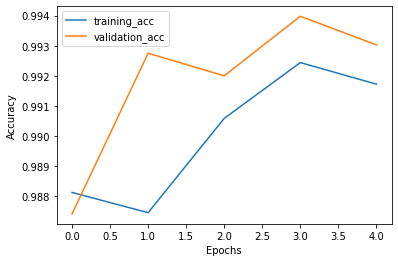

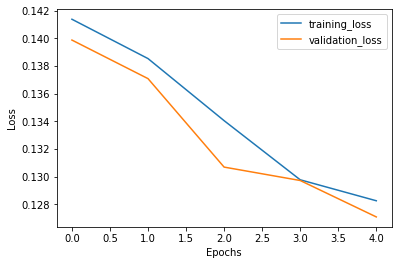

In [ ]:
bi_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC()])

history = bi_lstm_model.fit(X_train_tfidf_w2v, y_train,
                    epochs = 5,
                    validation_data = (X_val_tfidf_w2v, y_val), 
                    batch_size = 64,
                    callbacks = [call_back_bi_lstm]
                   )

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training_acc", "validation_acc"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["training_loss", "validation_loss"])
plt.show()

In [ ]:
print("\n Accuracy Score : {}".format(history.history['accuracy']))
print("\n Average AUC Score : {}".format(history.history['avg_AUC']))
print("\n Hamming loss : {}".format(history.history['Hamming_Loss']))
print("\n Log loss : {}".format(history.history['Log_Loss']))

#### Confusion Matrix

##### https://towardsdatascience.com/evaluating-multi-label-classifiers-a31be83da6ea

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
type(dnn_model)

keras.engine.sequential.Sequential

In [113]:
dnn_predictions = dnn_model.predict(X_test_tfidf_w2v)
dnn_predictions = np.where(dnn_predictions > 0.5, 1, 0)
print(multilabel_confusion_matrix(y_test,dnn_predictions))
print(classification_report(y_test,dnn_predictions))

[[[70480  1603]
  [ 2389  5253]]

 [[78909    24]
  [  758    34]]

 [[75103   403]
  [ 1664  2555]]

 [[79482     4]
  [  227    12]]

 [[74741  1050]
  [ 1482  2452]]

 [[78929    98]
  [  551   147]]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.72      7642
           1       0.59      0.04      0.08       792
           2       0.86      0.61      0.71      4219
           3       0.75      0.05      0.09       239
           4       0.70      0.62      0.66      3934
           5       0.60      0.21      0.31       698

   micro avg       0.77      0.60      0.67     17524
   macro avg       0.71      0.37      0.43     17524
weighted avg       0.76      0.60      0.65     17524
 samples avg       0.06      0.05      0.05     17524



In [116]:
bi_lstm_predictions = bi_lstm_model.predict(X_test_tfidf_w2v)
bi_lstm_predictions = np.where(bi_lstm_predictions > 0.5, 1, 0)
print(multilabel_confusion_matrix(y_test,bi_lstm_predictions))
print(classification_report(y_test,bi_lstm_predictions))

[[[68701  3382]
  [ 7482   160]]

 [[78933     0]
  [  792     0]]

 [[75506     0]
  [ 4219     0]]

 [[79486     0]
  [  239     0]]

 [[75791     0]
  [ 3934     0]]

 [[79027     0]
  [  698     0]]]
              precision    recall  f1-score   support

           0       0.05      0.02      0.03      7642
           1       0.00      0.00      0.00       792
           2       0.00      0.00      0.00      4219
           3       0.00      0.00      0.00       239
           4       0.00      0.00      0.00      3934
           5       0.00      0.00      0.00       698

   micro avg       0.05      0.01      0.02     17524
   macro avg       0.01      0.00      0.00     17524
weighted avg       0.02      0.01      0.01     17524
 samples avg       0.00      0.00      0.00     17524

